<a href="https://colab.research.google.com/github/Arthpatel01/AI_and_ML/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [5]:
column_names=["pregnant", "glucose", "bp", "s_thickness", "serum_insulin", "mass_index", "pedigree", "age", "target"]
df = pd.read_csv("/content/pima-indians-diabetes.csv", names=column_names)

In [6]:
df.head()

,pregnant,glucose,bp,s_thickness,serum_insulin,mass_index,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pregnant       768 non-null    int64  
 1   glucose        768 non-null    int64  
 2   bp             768 non-null    int64  
 3   s_thickness    768 non-null    int64  
 4   serum_insulin  768 non-null    int64  
 5   mass_index     768 non-null    float64
 6   pedigree       768 non-null    float64
 7   age            768 non-null    int64  
 8   target         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,pregnant,glucose,bp,s_thickness,serum_insulin,mass_index,pedigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7f16dd2d2c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f16dd624890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f16dd66cc90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f16e0c83050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f16df0aa390>,
  <matplotlib.lines.Line2D at 0x7f16e0ce4450>]}

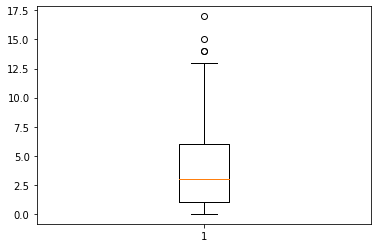

In [10]:
plt.boxplot(df['pregnant'])

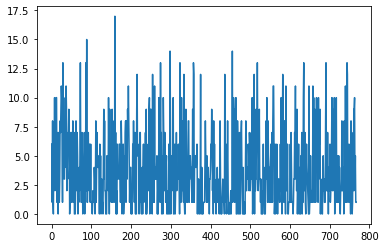

In [12]:
plt.plot(df.pregnant)

{'boxes': [<matplotlib.lines.Line2D at 0x7f16dccdf290>],
 'caps': [<matplotlib.lines.Line2D at 0x7f16dcce8b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f16dccef750>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f16dccefa10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f16dccdf750>,
  <matplotlib.lines.Line2D at 0x7f16dcce8f10>]}

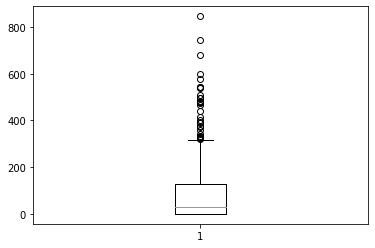

In [13]:
plt.boxplot(df.serum_insulin)

In [14]:

x = df.drop('target', axis=1)
y = df['target']

In [15]:
x.head()

,pregnant,glucose,bp,s_thickness,serum_insulin,mass_index,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: target, Length: 768, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
x_train.shape, x_test.shape, y_train.shape

((614, 8), (154, 8), (614,))

In [20]:
#Model:

model = Sequential()

In [21]:
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [22]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 1s 1ms/step - loss: 2.8302 - accuracy: 0.5114
Epoch 2/150
62/62 [==============================] - 0s 1ms/step - loss: 0.9442 - accuracy: 0.5375
Epoch 3/150
62/62 [==============================] - 0s 1ms/step - loss: 0.8100 - accuracy: 0.6205
Epoch 4/150
62/62 [==============================] - 0s 1ms/step - loss: 0.7536 - accuracy: 0.6042
Epoch 5/150
62/62 [==============================] - 0s 1ms/step - loss: 0.7106 - accuracy: 0.6287
Epoch 6/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.6384
Epoch 7/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.6498
Epoch 8/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.6564
Epoch 9/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6460 - accuracy: 0.6352
Epoch 10/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6465 - accuracy: 0.6726
Epoch 11/

In [36]:
predictions = model.predict(x_test)

In [37]:
predictions

array([[0.16461301],
       [0.1304582 ],
       [0.3635078 ],
       [0.42943493],
       [0.9738951 ],
       [0.27620405],
       [0.08342776],
       [0.55985606],
       [0.2682863 ],
       [0.03217927],
       [0.4884873 ],
       [0.36741632],
       [0.92441213],
       [0.786497  ],
       [0.155965  ],
       [0.19718254],
       [0.7470889 ],
       [0.37445763],
       [0.4287396 ],
       [0.08499923],
       [0.1612204 ],
       [0.73362815],
       [0.11291295],
       [0.04777595],
       [0.0834215 ],
       [0.48337865],
       [0.51881105],
       [0.10123616],
       [0.16899982],
       [0.23323104],
       [0.6807462 ],
       [0.42352912],
       [0.07722306],
       [0.16018143],
       [0.10395157],
       [0.1794354 ],
       [0.21459731],
       [0.01300961],
       [0.15879759],
       [0.24419051],
       [0.28807253],
       [0.11971003],
       [0.5262461 ],
       [0.12375376],
       [0.12488276],
       [0.95669544],
       [0.07727456],
       [0.456

In [38]:
y_test

205    0
247    0
560    1
233    0
45     1
      ..
380    0
525    0
733    0
704    0
143    1
Name: target, Length: 154, dtype: int64

In [39]:
predictions = np.round(predictions).astype(int)

In [40]:
predictions

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
    

In [41]:
from sklearn.metrics import accuracy_score 

In [50]:
accuracy_score(y_test.values, predictions)

0.7077922077922078

In [49]:
y_test.values

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

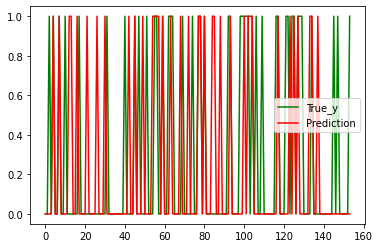

In [51]:
plt.plot(y_test.values, color="green")
plt.plot(predictions, color="red")
plt.legend(["True_y", "Prediction"])
plt.show()